<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:9- ANN for time series forecasting (Stock prices prediction)</center></h1></u>

Hello everyone!! A hearty welcome to the Assignment 9 of the time series module.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDOxLqNucUK2MSvtuz6pNWalpZzQSzbtOSkDSmibEcxZgtVDAs_-AaBuCyt1aI09HZ-go&usqp=CAU)

In this assignment you will be learning about ANN for time series and also implement a project on Stock prices prediction.

<h2><u>Table of Contents:</h2></u>

1. Artificial Neural Networks (ANN)<br>
2. Stock prices prediction<br>

<h2><u>Artificial Neural Networks (ANN)</h2></u>

The term "neural network" refers to a set of algorithms that attempt to emulate the human brain by determining the relationship between pieces of data. It's employed in a variety of applications, including regression, classification, and image recognition, among others. The biological neural network processes data in parallel, but the artificial neural network processes data in series. Additionally, the former's processing is slower (in milliseconds), whilst the latter's processing is faster (in a nanosecond).

![](https://miro.medium.com/max/1838/1*eBMwpBBboAXgqsawwOKkPw.png)

* <h5><u>Architecture Of ANN</h5></u>

A neural network includes several layers, each of which performs a specialised job. As the model's complexity grows, the number of layers grows as well, which is why it's called a multi-layer perceptron.

A neural network in its purest form includes three layers: an input layer, a hidden layer, and an output layer. The input layer receives the input signals and passes them on to the next layer, with the output layer delivering the final prediction. These neural networks, like machine learning methods, must be taught with some training data before being used to solve a specific problem.

![](https://www.researchgate.net/profile/Facundo-Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

* <h5><u>Working Of ANN</h5></u>

Information is first fed into the input layer, which then passes it on to the hidden layers, and the interconnection between these two layers assigns weights to each input at random at first. The weighted total, which is a combination of weights and bias, is then transmitted through the activation function after bias is added to each input neuron. The Activation Function is in charge of deciding which node to fire for feature extraction and then calculating the output. Foreward Propagation is the name given to this entire process. After comparing the output model to the original output and determining the error, weights are adjusted in backward propagation to lower the error, and this process is repeated for a set number of epochs (iteration). Finally, the model weights are adjusted, and the prediction process is completed.

![](https://editor.analyticsvidhya.com/uploads/708832021-07-19.png)

You can now see the detailed perspective of each neuron in the image above. Here, each neuron has some weights (w1, w2, w3) and biases, and computations are done as follows: combination = bias + weights * input (F = w1*x1 + w2*x2 + w3*x3), and finally activation function is applied output = activation(combination). In the above picture, activation is sigmoid represented by 1/(1 + e-F). Other activation functions include ReLU, Leaky ReLU, tanh, and a slew of others.


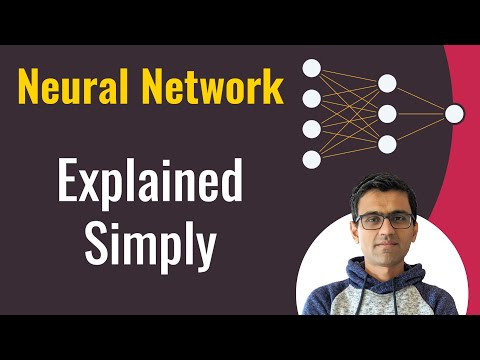

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('ER2It2mIagI', width=700, height=400)

* <h5><u>Activation functions</h5></u>

The activation function calculates a weighted total and then adds bias to it to determine whether a neuron should be activated or not. The activation function's goal is to introduce non-linearity into a neuron's output.

![](https://www.researchgate.net/profile/Rahul-Jayawardana/publication/350567223/figure/fig3/AS:1007855343767554@1617302847631/Fig-3-The-basic-activation-functions-of-the-neural-networksNeural-Networks.jpg)

### Refer the given video

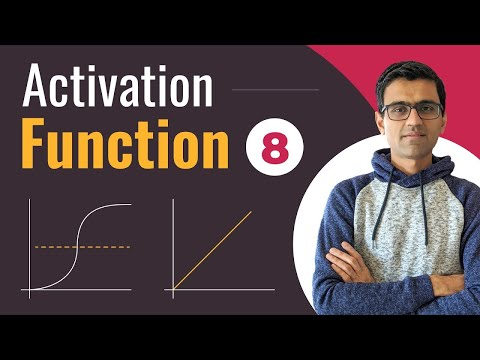

In [2]:
YouTubeVideo('icZItWxw7AI', width=700, height=400)

<h2><u>Stock prices prediction</h2></u>

A stock market is a public market where you may purchase and sell shares in firms that are publicly traded. The stocks, also known as equities, indicate the company's ownership. Machine learning-based stock price prediction assists you in determining the future worth of a company's stock and other financial assets traded on an exchange.

**Watch the given video, it implements stock price prediction using LSTM which is a type of artificial neural networks. We will looking into LSTM futher, for now focus on the procedure of stock price prediction.**


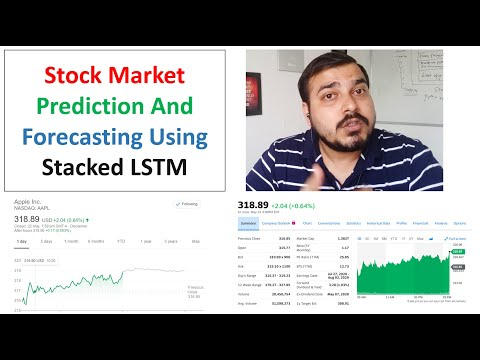

In [3]:
YouTubeVideo('H6du_pfuznE', width=700, height=400)

Lets start by importing the necessary libraries.
* pandas: for storing and analyzing data
* matplotlib: for plotting graphs and visualizations
* numpy: for array and matrix operations
* datetime: to manipulate datetime objects
* sqrt from math: to take square root of a value
* Sequential: groups a linear stack of layers into a tf.keras.Model.
* Dense layer: regular deeply connected neural network layer
* Dropout layer: implements dropout regularization
* Activation layer: Applies an activation function to an output

In [5]:
#import numpy as np
#import matplotlib as plt
#import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import math
from math import sqrt
#import sequential from keras
from keras.models import Sequential
#import dense, dropout , Activation from keras.layers
# Instead of importing from keras.layers.core, import from keras.layers
from keras.layers import Dense, Dropout, Activation

The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [6]:
# import drive from google.colab
import google.colab.drive as drive
# mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


Start by reading and loading the data. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/139dzxtxWEoU6U3UBVStqwH9Z9GTooiJ0/view?usp=sharing

Create a function to read the stock data. Get the column names of dataset in another variable. The code gets the stock data from a csv file. The code creates a DataFrame with all of this information in it. Then split the date into year, month, and day based on '-' character. Also divide the volume by 10000 to get an average value for each day of trading.


In [7]:
#create the get_stcok_data function
def get_stock_data():
    #get the dataset path
    url='/content/EDELWEISSNS.csv'
    #read the dataset
    df=pd.read_csv(url)
    #get column names
    columns=df.columns

    #read the dataset
    df=pd.read_csv(url)

    #copy the dataset into another variable
    df1=df.copy()

    #split the date column based on '-' character
    df1[['year','month','day']]=df1['Date'].str.split('-',expand=True)

    #load the splitted dates into new columns as year,month,day
    df1['year']=df1['year'].astype(int)
    df1['month']=df1['month'].astype(int)
    df1['day']=df1['day'].astype(int)

    #divide the volumne column by 10000
    df1['Volume']=df1['Volume']/10000

    #return the dataset
    return df1



Now apply the above created function and print the first five rows.

In [8]:
#get_stock_data
df=get_stock_data()

#print first 5 rows of dataset
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,29.296358,18.509,2008,10,3
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,28.602345,20.434,2008,10,6
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,26.111885,12.897,2008,10,7
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,29.552996,70.049,2008,10,8
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,27.405914,36.738,2008,10,10


Hence the dataset now contains 10 columns, 3 of which are year, month, day and others are Date,Open,High,Low,Close,Volume,Adj Close.

* Open: The price of the stock when the market opens in the morning
* Close: The price of the stock when the market closed in the evening
* High: Highest price the stock reached during that day
* Low: Lowest price the stock is traded on that day
* Volume: The total amount of stocks traded on that day

Next task to drop the unnecessary columns which are date,low, adj close, year,month and day.

In [9]:
#drop the columns
df.drop(['Date','Low','Adj Close','year','month','day'],axis=1,inplace=True)

#print first 5 rows of dataset
df.head()



,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,18.509
1,39.700001,40.799999,39.564999,20.434
2,40.000000,40.599998,36.119999,12.897
3,35.000000,44.400002,40.880001,70.049
4,40.400002,40.400002,37.910000,36.738


Next normalize the data by dividing each column by 100 but multiply the volume by 100 (to make the data on equal scale). Create a new list named nan_value_index, in which you need to collect indexes having nan values. Next for each column, store the nan values in a new variable. Then iterate through all values in the columns and substitute the '1' value with 0. Append the index having this 1 value in the nan_value_index list.

In [19]:
#divide 'open' by 100
df['Open']=df['Open']/100

#divide 'high' by 100
df['High']=df['High']/100

#divide 'close' by 100
df['Close']=df['Close']/100

#multiply 'volume' by 100
df['Volume']=df['Volume']*100


#divide 'clode' by 100
df['Close']=df['Close']/100

#print df
df.head()

#create new list
nan_value_index=[]

#get nan values of 'high' column
high=df['High'].isnull()

#iterate through 'high'
for i in range(len(high)):

    #check if the value is '1'
    if high[i]==True:

        #append the i index
        nan_value_index.append(i)

        #substitue with '0'
        df['High'][i]=0

#get nan values of 'open' column
open_series=df['Open'].isnull()

#iterate through 'open'
for i in range(len(open_series)):

    #check if the value is '1'
    if open_series[i]==True:

      #append the i index
      nan_value_index.append(i)

        #substitue with '0'
      df['Open'][i]=0


#get nan values of 'volume' column
volume=df['Volume'].isnull()

#iterate through 'volume'
for i in range(len(volume)):

    #check if the value is '1'
    if volume[i]==True:

      #append the i index
      nan_value_index.append(i)

        #substitue with '0'
      df['Volume'][i]=0


#get nan values of 'close' column
close=df['Close'].isnull()

#iterate through 'close'
for i in range(len(close)):

    #check if the value is '1'
    if close[i]==True:

      #append the i index
      nan_value_index.append(i)

        #substitue with '0'
      df['Close'][i]=0



#print nan_value_index
print(nan_value_index)

[35, 325, 803, 842, 972, 1014, 1351, 1580, 35, 325, 803, 842, 972, 1014, 1351, 1580]


<ipython-input-19-e188e76029a6>:67: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Volume'][i]=0
<ipython-input-19-e188e76029a6>:67: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values throug

Hence now the data has been normalized in the range 0 to 10. And also NAN values have been removed.

Now we need to divide the data into training and testing data. For that first seperate the dependent and independent variables. ['High','Open', 'Volume'] are independent variables and 'Close' is the dependent variable as the closing value of the stock has to be predicted.Choose a factor on which the division depends. Here we set the factor to 0.80 as we need 80% of the data for training and rest data for testing. Get the total training size by multiplying the selected factor with length of the training data. Divide the data into testing and training data based on this total training size.

In [20]:
#get independent variables in X
X=df[['High','Open','Volume']]

#get dependent variable in Y
Y=df['Close']

#set factor to 0.80
factor=0.80

#get length of X
length=len(X)

#get total training size by multiplying factor and length of X
total_for_train=int(length*factor)


#X_train = X[:total_for_train]
X_train=X.iloc[:total_for_train]

#X_test = X[total_for_train:]
X_test=X.iloc[total_for_train:]


#get Y_train
Y_train=Y.iloc[:total_for_train]

#get Y_test
Y_test=Y.iloc[total_for_train:]




Now check the shapes of the training and testing data using the shape method.

In [21]:
#print shape of X-train
print(X_train.shape)

#print shape of Y-train
print(Y_train.shape)

#print shape of X-Test
print(X_test.shape)

#print shape of Y-test
print(Y_test.shape)



(1973, 3)
(1973,)
(494, 3)
(494,)


Now start by creating a Sequential object. This is the classifier that will be used to make predictions on the training data. Then add two Dense objects, one with 32 units and another with 10 units. These are both ReLU activations.Next, add a Dense object with 1 unit and linear activation followed by compiling the model using adam optimizer and mean squared error loss function for metrics.Finally, fit the model on X_train (the training set) and Y_train (the target variable) keeping 0.05 amount of data for validation and 10 epochs.

In [23]:
#create Sequential object
model=Sequential()

#add first dense layer with input_dim as 3
model.add(Dense(32,input_dim=3,activation='relu'))

#add second dense layer
model.add(Dense(10,activation='relu'))

#add third dense layer
model.add(Dense(1,activation='linear'))

#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

#fit the model (X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)
model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_split=0.05)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan                                  
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 10/10
15/15 ━━━━━━━━━━

Lets predict the testing data using the predict method.

In [24]:
#predict X_test
predictions=model.predict(X_test)

#print last 10 values of predictions
print(predictions[-10:])


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


Check the training and testing score uisng the mean squared error. Use the evaluate function by passing the X_train, Y_train and then apply the sqrt function of math library to get the MSE and RMSE. Do the same for testing data.

In [25]:
#evaluate training data
train_score=model.evaluate(X_train,Y_train)

#print MSE and RMSE
print('MSE:',train_score[1])
print('RMSE:',sqrt(train_score[1]))

#evaluate testing data
test_score=model.evaluate(X_test,Y_test)

#print MSE and RMSE
print('MSE:',test_score[1])
print('RMSE:',sqrt(test_score[1]))


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mse: nan
MSE: nan
RMSE: nan
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mse: nan 
MSE: nan
RMSE: nan


The overall score is good.
### Well done!!!

Now plot the predictions and Y_test using tthe matplotlib library.

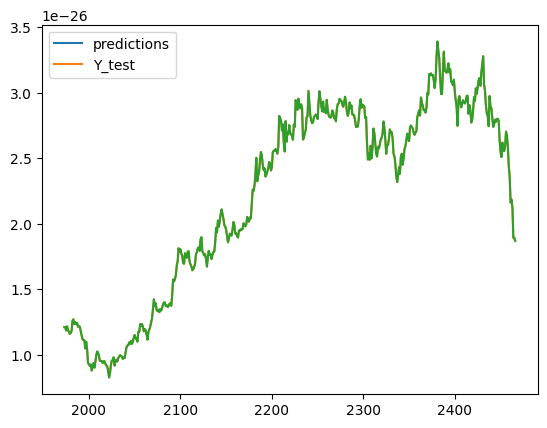

In [26]:
#plot predictions
plt.plot(predictions)

#plot Y_test
plt.plot(Y_test)

#set legend as upper left
plt.legend(['predictions','Y_test'])


#plot Y_test
plt.plot(Y_test)

#set legend as upper left
plt.legend(['predictions','Y_test'])



Congratulations!!! You've done it.

In this assignment you learned:

* Artificial Neural Networks
* Forecasting time series with ANNs


Keep practising until next assignment comes in. <br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br>


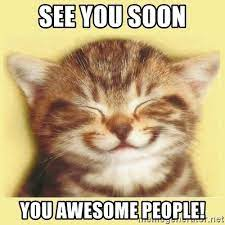